In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
df = pd.read_csv('../data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# Select Feature

X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
# Scale features

sc = StandardScaler()
x_scale = sc.fit_transform(X)

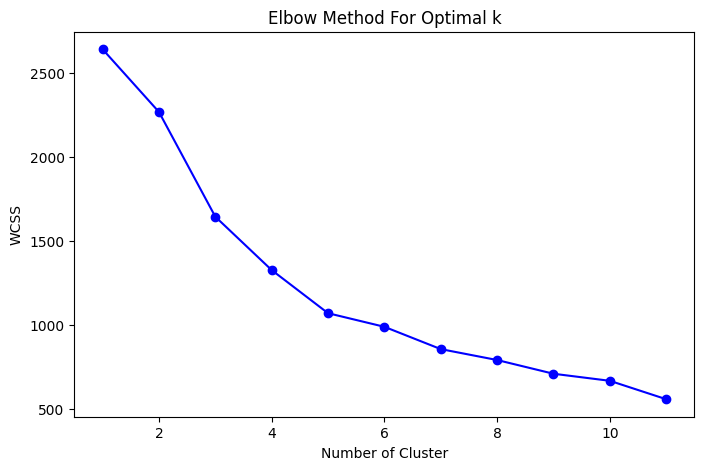

In [7]:
# Find optimal number of cluster using wcss
wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scale)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,12), wcss, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Kmeans
optimal = 6
kmeans = KMeans(n_clusters=optimal, random_state=42)
label_kmeans = kmeans.fit_predict(x_scale)

In [9]:
# Mean Shift

optimal_bandwidth = estimate_bandwidth(x_scale, quantile=0.2, n_samples=300)

mean_shift = MeanShift(bandwidth=optimal_bandwidth)
label_meanshift = mean_shift.fit_predict(x_scale)
k_meanshift = len(np.unique(label_meanshift))
k_meanshift

22

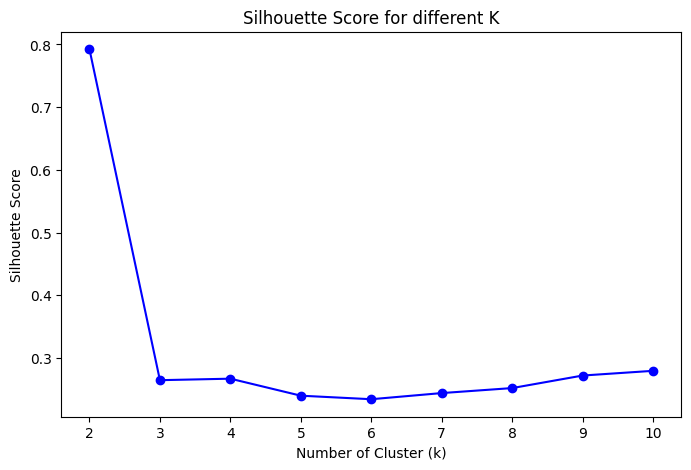

In [10]:
# Hierarchical Clustering 

sil_score = []

for i in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    label = agglo.fit_predict(x_scale)
    sil_score.append(silhouette_score(x_scale, label))
    
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_score, 'bo-')
plt.title('Silhouette Score for different K')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

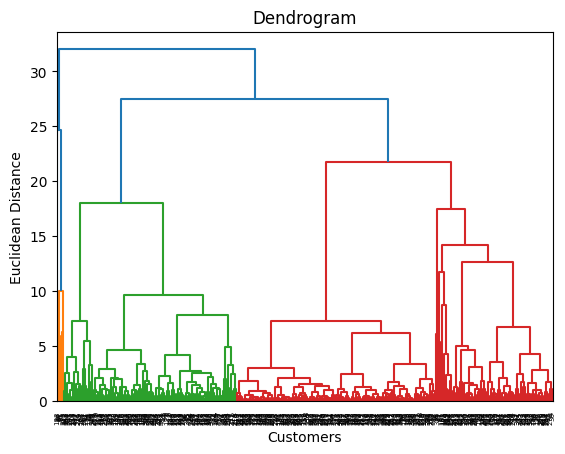

In [11]:
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(hierarchy.linkage(x_scale, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [12]:
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(x_scale)

In [13]:
def print_metrics(name, X, labels):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    print(f"\n{name} Clustering:")
    print(f" - Clusters: {len(np.unique(labels))}")
    print(f" - Silhouette Score: {sil:.3f} (higher is better)")
    print(f" - Davies-Bouldin Index: {db:.3f} (lower is better)")

In [14]:
print_metrics('KMeans', x_scale, label_kmeans)
print_metrics('Mean Shift', x_scale, label_meanshift)
print_metrics('Agglomerative Clustering', x_scale, agglo_labels)


KMeans Clustering:
 - Clusters: 6
 - Silhouette Score: 0.276 (higher is better)
 - Davies-Bouldin Index: 1.164 (lower is better)

Mean Shift Clustering:
 - Clusters: 22
 - Silhouette Score: 0.277 (higher is better)
 - Davies-Bouldin Index: 0.642 (lower is better)

Agglomerative Clustering Clustering:
 - Clusters: 2
 - Silhouette Score: 0.792 (higher is better)
 - Davies-Bouldin Index: 0.909 (lower is better)


Text(0.5, 1.0, 'Agglomerative Clusters (k= 2)')

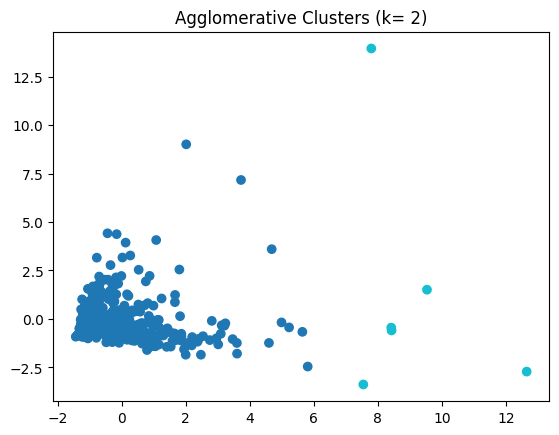

In [15]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scale)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=agglo_labels, cmap='tab10')
plt.title(f'Agglomerative Clusters (k= 2)')

Text(0.5, 1.0, 'Kmeans Clusters (k=6)')

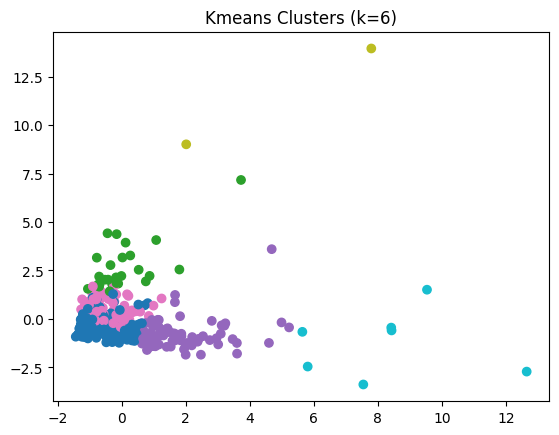

In [16]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=label_kmeans, cmap='tab10')
plt.title(f'Kmeans Clusters (k={optimal})')

Text(0.5, 1.0, 'Mean Shift Clusters (k=22)')

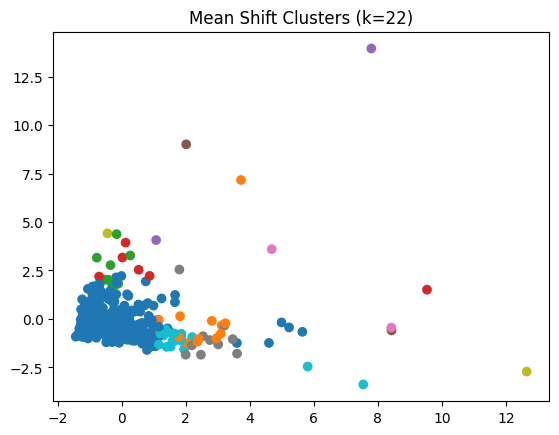

In [17]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=label_meanshift, cmap='tab10')
plt.title(f'Mean Shift Clusters (k={k_meanshift})')

In [18]:
df['Cluster'] = agglo_labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


In [19]:
df['Cluster'].value_counts()

Cluster
0    434
1      6
Name: count, dtype: int64

In [21]:
# save the best model
import joblib as job

job.dump(agglo, '../model/agglo.pkl')

['../model/agglo.pkl']